In [1]:
ls /mnt/sda2/exp3_llj/

n1_les_wrfout_d01_20130302.nc  n2_wrfout_d01_20130302.nc
n1_les_wrfout_d02_20130302.nc  n2_wrfout_d02_20130302.nc
n1_les_wrfout_d03_20130302.nc  n2_wrfout_d03_20130302.nc
n1_wrfout_d01_20130302.nc      wrfout_d01_2013-03-02_00:00:00
n1_wrfout_d02_20130302.nc      wrfout_d02_2013-03-02_00:00:00
n1_wrfout_d03_20130302.nc      wrfout_d03_2013-03-02_00:00:00


In [4]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from wrf import getvar, vinterp, ALL_TIMES

wrfdata = '/mnt/sda2/exp3_llj/n1_les_wrfout_d01_20130302.nc'



In [5]:
from wrf import getvar, vinterp, ALL_TIMES
uv, wdir = getvar(wrfdata, "uvmet_wspd_wdir", units="m s-1", timeidx=ALL_TIMES)
tv = getvar(wrfdata, "tv", units="degC", timeidx=ALL_TIMES)


AttributeError: 'str' object has no attribute 'variables'

In [ ]:
## xx, yy = 30, 30
print(uv.shape)
uv[10,1,xx,yy]                         # gfs         nam
# Colima Sodar  18.966187 -103.86911     20,30       d1 13,13 d3: 5,5
# Art. Guilles  19.28     -103.70        40,40

In [42]:

# Interpolate levels
interp_levels = [.010, .020, .030, .040, .050, .100, .150, .200,
                 .250, .300, .350, .400, .450, .500]

interp_uv = vinterp(wrflist, field=uv, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES, extrapolate=True, field_type='z', log_p=True)

#interp_wdir = vinterp(dataset, field=wdir, vert_coord='ght_agl', interp_levels=interp_levels,
#                    timeidx=ALL_TIMES) #, extrapolate=True, field_type="z", log_p=True)

interp_uv.shape

(991, 14, 60, 60)

In [47]:
interp_uv[990,:,xx,yy]

<xarray.DataArray 'uvmet_wspd_wdir' (interp_level: 14)>
array([ 4.2378  ,  4.2378  ,  4.248482,  4.352408,  4.456335,  4.969194,
        4.82701 ,  4.70382 ,  4.769226,  4.834633,  4.850932,  4.840907,
        4.830881,  4.741703], dtype=float32)
Coordinates:
    wspd_wdir     <U4 'wspd'
    XLONG         float32 -103.566
    XLAT          float32 19.4324
    XTIME         float64 9.9e+03
    Time          datetime64[ns] 2013-03-07T21:00:00
  * interp_level  (interp_level) float64 0.01 0.02 0.03 0.04 0.05 0.1 0.15 ...
Attributes:
    FieldType:         104
    MemoryOrder:       XYZ
    description:       earth rotated wspd,wdir
    units:             m s-1
    stagger:           
    coordinates:       XLONG XLAT XTIME
    projection:        LambertConformal(stand_lon=-103.5999984741211, moad_ce...
    vert_interp_type:  ght_agl

In [51]:
import numpy as np
timeArraywrf=np.arange(np.datetime64('2013-03-01'), np.datetime64('2013-03-07 21:01'),np.timedelta64(10,'m'))
timeArraywrf.shape

(991,)

In [54]:
import pandas as pd
lon, lat = xx, yy
wrf10 = pd.Series(interp_uv[:,0,lon,lat], index=timeArraywrf)
wrf20 = pd.Series(interp_uv[:,1,lon,lat], index=timeArraywrf)
wrf30 = pd.Series(interp_uv[:,2,lon,lat], index=timeArraywrf)
wrf40 = pd.Series(interp_uv[:,3,lon,lat], index=timeArraywrf)
wrf50 = pd.Series(interp_uv[:,4,lon,lat], index=timeArraywrf)
wrf100 = pd.Series(interp_uv[:,5,lon,lat], index=timeArraywrf)
wrf150 = pd.Series(interp_uv[:,6,lon,lat], index=timeArraywrf)
wrf200 = pd.Series(interp_uv[:,7,lon,lat], index=timeArraywrf)
wrf250 = pd.Series(interp_uv[:,8,lon,lat], index=timeArraywrf)
wrf300 = pd.Series(interp_uv[:,9,lon,lat], index=timeArraywrf)
wrf350 = pd.Series(interp_uv[:,10,lon,lat], index=timeArraywrf)
wrf400 = pd.Series(interp_uv[:,11,lon,lat], index=timeArraywrf)
wrf450 = pd.Series(interp_uv[:,12,lon,lat], index=timeArraywrf)
wrf500 = pd.Series(interp_uv[:,13,lon,lat], index=timeArraywrf)

In [55]:
import pandas as pd
# Variables to store data temporarily #238 dias * 48dt = 11424 times
# (11424 lineas de los tiempos, 98 niveles)
spd=(pd.read_csv('wind', header=None, low_memory=False)).values.reshape((11424, 98))
drc=(pd.read_csv('direc', header=None, low_memory=False)).values.reshape((11424, 98))

import numpy as np
timeArraySod=np.arange(np.datetime64('2012-08-16 00:30'), np.datetime64('2013-04-11 00:30'),np.timedelta64(30,'m'))
# (11424 lineas de los tiempos, 98 niveles)
spd[spd>99.9] = np.nan
drc[drc>999 ] = np.nan
colNames=["spd_"+str((i+3)*10) for i in range(98)] 
sp=pd.DataFrame(data=spd, index=timeArraySod, columns=colNames, dtype=None)
dd=pd.DataFrame(data=drc, index=timeArraySod, columns=colNames, dtype=None)

In [56]:
d1 = 9456
d2 = d1+330
print (timeArraySod[d1], timeArraySod[d2])

2013-03-01T00:00 2013-03-07T21:00


In [58]:
sod30  = pd.Series(sp['2013-03-01':'2013-03-07 23:30'].iloc[:,0], index=timeArraySod[d1:d2])
sod50  = pd.Series(sp['2013-03-01':'2013-03-07 23:30'].iloc[:,2], index=timeArraySod[d1:d2])
sod100 = pd.Series(sp['2013-03-01':'2013-03-07 23:30'].iloc[:,7], index=timeArraySod[d1:d2])
sod150 = pd.Series(sp['2013-03-01':'2013-03-07 23:30'].iloc[:,12], index=timeArraySod[d1:d2])
sod200 = pd.Series(sp['2013-03-01':'2013-03-07 23:30'].iloc[:,17], index=timeArraySod[d1:d2])
sod250 = pd.Series(sp['2013-03-01':'2013-03-07 23:30'].iloc[:,22], index=timeArraySod[d1:d2])
sod300 = pd.Series(sp['2013-03-01':'2013-03-07 23:30'].iloc[:,27], index=timeArraySod[d1:d2])
sod350 = pd.Series(sp['2013-03-01':'2013-03-07 23:30'].iloc[:,32], index=timeArraySod[d1:d2])
sod400 = pd.Series(sp['2013-03-01':'2013-03-07 23:30'].iloc[:,37], index=timeArraySod[d1:d2])
sod450 = pd.Series(sp['2013-03-01':'2013-03-07 23:30'].iloc[:,42], index=timeArraySod[d1:d2])
sod500 = pd.Series(sp['2013-03-01':'2013-03-07 23:30'].iloc[:,47], index=timeArraySod[d1:d2])


In [76]:
wrf1 = pd.DataFrame(index=timeArraySod[d1:d2])
wrf1['w10'] = wrf10
wrf1['w20'] = wrf20
wrf1['w30'] = wrf30
wrf1['s30'] = sod30
wrf1['w50'] = wrf50
wrf1['s50'] = sod50
wrf1['w100'] = wrf100
wrf1['s100'] = sod100
wrf1['w150'] = wrf150
wrf1['s150'] = sod150
wrf1['w200'] = wrf200
wrf1['s200'] = sod200
wrf1['w250'] = wrf250
wrf1['s250'] = sod250
wrf1['w300'] = wrf300
wrf1['s300'] = sod300
wrf1['w350'] = wrf350
wrf1['s350'] = sod350
wrf1['w400'] = wrf400
wrf1['s400'] = sod400
wrf1['w450'] = wrf450
wrf1['s450'] = sod450
wrf1['w500'] = wrf500
wrf1['s500'] = sod500
wrf1.to_pickle('wrf_nam_les_d3.pk')
wrf1

,w10,w20,w30,s30,w50,s50,w100,s100,w150,s150,...,w300,s300,w350,s350,w400,s400,w450,s450,w500,s500
2013-03-01 00:00:00,3.857928,3.857928,3.857655,3.08,3.852565,0.54,3.839891,1.50,3.831259,0.64,...,3.742490,0.03,3.661597,1.24,3.558586,2.46,3.455577,3.96,3.286159,3.34
2013-03-01 00:30:00,4.771570,4.771570,4.795808,NaN,5.160203,1.19,6.038670,1.57,5.853286,0.53,...,4.879505,0.15,4.430910,1.16,3.953568,1.56,3.476257,2.64,3.109241,4.29
2013-03-01 01:00:00,4.282058,4.282058,4.303351,3.30,4.593551,1.92,5.271256,1.62,4.730532,0.76,...,3.092792,NaN,2.769026,0.54,2.535687,0.95,2.302356,2.50,2.089188,4.18
2013-03-01 01:30:00,2.572622,2.572622,2.567603,2.80,2.499904,2.85,2.321917,1.89,1.909950,0.97,...,1.693673,NaN,1.819759,NaN,1.971545,NaN,2.123334,1.78,2.313099,NaN
2013-03-01 02:00:00,1.500614,1.500614,1.511472,2.07,1.682054,1.19,2.100200,1.02,2.208860,0.49,...,2.258039,0.65,2.229818,0.78,2.198802,1.76,2.167786,3.59,2.178364,5.53
2013-03-01 02:30:00,1.181522,1.181522,1.182275,0.52,1.193312,0.11,1.222559,0.04,1.302573,0.84,...,1.365645,0.77,1.528854,1.09,1.761801,1.84,1.994755,3.85,2.115150,6.23
2013-03-01 03:00:00,1.739295,1.739295,1.754812,0.79,1.975802,0.28,2.505993,0.25,2.398344,0.13,...,2.147080,0.34,2.070941,0.73,1.993937,1.60,1.916934,3.73,1.836911,5.41
2013-03-01 03:30:00,2.841115,2.841115,2.839013,3.29,2.809690,2.37,2.736914,1.35,2.678271,0.41,...,2.648614,0.81,2.466400,1.92,2.207353,1.08,1.948314,1.63,1.844078,3.93
2013-03-01 04:00:00,2.147054,2.147054,2.162078,2.80,2.358157,3.22,2.821310,2.36,2.653165,1.23,...,1.940175,0.71,1.717275,0.92,1.510867,1.64,1.304466,1.41,1.220193,2.48
2013-03-01 04:30:00,2.450732,2.450732,2.439994,NaN,2.297273,1.43,1.938133,0.92,1.521532,0.49,...,1.481277,1.92,1.623542,2.76,1.763048,1.01,1.902557,0.71,1.955203,1.41


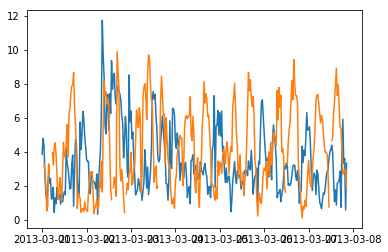

In [61]:
plt.plot(wrf1['w30'])
plt.plot(wrf1['s30'])
plt.show()

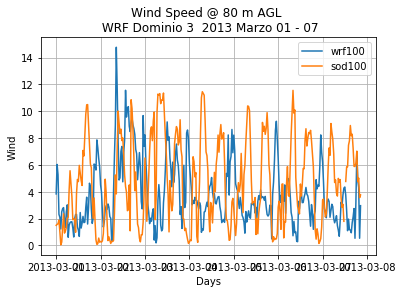

In [64]:
import pandas as pd

plt.plot(wrf1['w100'], label='wrf100')
plt.plot(wrf1['s100'], label='sod100')

plt.title('Wind Speed @ 80 m AGL \n WRF Dominio 3  2013 Marzo 01 - 07')
plt.ylabel('Wind')
plt.xlabel('Days')

dt=6

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
plt.show()


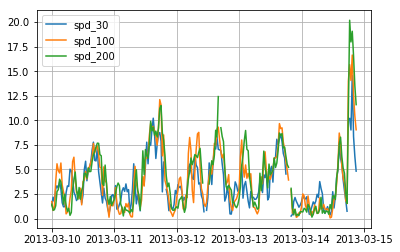

In [65]:
s30 = sp['2013-03-10':'2013-03-14 21:00'].iloc[:,0]
s100 = sp['2013-03-10':'2013-03-14 21:00'].iloc[:,7]
s200 = sp['2013-03-10':'2013-03-14 21:00'].iloc[:,17]
plt.plot(s30)
plt.plot(s100)
plt.plot(s200)
plt.legend()
plt.grid(True)
plt.savefig('sodar_20130310_30_200_wrf_d03.png', dpi=400)


In [66]:
np.cov(wrf100, wrf80)

array([[ 5.94403174,  6.13368434],
       [ 6.13368434,  7.23642093]])

In [68]:
np.cov(wrf1['w100'], wrf1['s100'])

array([[ 5.71055602,         nan],
       [        nan,         nan]])

In [71]:
wrf1['w100'].shape

(330,)

In [75]:
wrf100.shape

(991,)